In [1]:
import pandas as pd
import numpy as np
from osprey.config import Config
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from os.path import join

/Users/robert_arbon/anaconda/envs/ml4dyn/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/robert_arbon/anaconda/envs/ml4dyn/lib/python3.5/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:

df = Config(join('./', 'config-shuffle.yaml')).trial_results()
df['data_fraction'] = 0.005

Loading config file:     ./config-shuffle.yaml...
Loading trials database: sqlite:///osprey-trials.db...


In [3]:
df.tail()


,completed,config_sha1,elapsed,host,id,mean_test_score,mean_train_score,n_test_samples,n_train_samples,parameters,project_name,started,status,test_scores,traceback,train_scores,user,data_fraction
196,2017-12-17 00:26:33.214340,dec0253b485970a8f5583bd563ac6e5027079b78,1970-01-01 00:00:03.673543,MacBook-Pro-3.local,298,1.173087,3.114805,"[398, 398, 398, 398, 398, 398, 398, 398, 398, ...","[396, 396, 396, 396, 396, 396, 396, 396, 396, ...","{'msm__sparse': False, 'msm__count_mode': 'sli...",split,2017-12-17 00:26:29.540797,SUCCEEDED,"[1.1277327771983625, 1.0995539952736142, 1.222...",None,"[3.3364295026189965, 3.269087510786302, 3.1175...",robert_arbon,0.005
197,2017-12-17 00:26:36.889086,dec0253b485970a8f5583bd563ac6e5027079b78,1970-01-01 00:00:03.550614,MacBook-Pro-3.local,299,1.247005,3.181095,"[398, 398, 398, 398, 398, 398, 398, 398, 398, ...","[396, 396, 396, 396, 396, 396, 396, 396, 396, ...","{'msm__sparse': False, 'msm__count_mode': 'sli...",split,2017-12-17 00:26:33.338472,SUCCEEDED,"[1.1286849851030878, 1.2002986830432143, 1.083...",None,"[3.2176414110317553, 3.325809849850531, 3.4036...",robert_arbon,0.005
198,2017-12-17 00:26:40.028509,dec0253b485970a8f5583bd563ac6e5027079b78,1970-01-01 00:00:03.048470,MacBook-Pro-3.local,300,1.175551,3.155913,"[398, 398, 398, 398, 398, 398, 398, 398, 398, ...","[396, 396, 396, 396, 396, 396, 396, 396, 396, ...","{'msm__sparse': False, 'msm__count_mode': 'sli...",split,2017-12-17 00:26:36.980039,SUCCEEDED,"[1.1048955759230468, 1.404159972029136, 1.1518...",None,"[3.170904031857687, 3.216056439078603, 2.91903...",robert_arbon,0.005
199,2017-12-17 00:26:43.312718,dec0253b485970a8f5583bd563ac6e5027079b78,1970-01-01 00:00:03.189598,MacBook-Pro-3.local,301,1.172327,3.216362,"[398, 398, 398, 398, 398, 398, 398, 398, 398, ...","[396, 396, 396, 396, 396, 396, 396, 396, 396, ...","{'msm__sparse': False, 'msm__count_mode': 'sli...",split,2017-12-17 00:26:40.123120,SUCCEEDED,"[1.2172856481224377, 1.0220893898866137, 1.091...",None,"[3.061933685248229, 3.257737727255495, 3.38964...",robert_arbon,0.005
200,2017-12-17 00:26:46.803583,dec0253b485970a8f5583bd563ac6e5027079b78,1970-01-01 00:00:03.236189,MacBook-Pro-3.local,302,1.237464,3.259083,"[398, 398, 398, 398, 398, 398, 398, 398, 398, ...","[396, 396, 396, 396, 396, 396, 396, 396, 396, ...","{'msm__sparse': False, 'msm__count_mode': 'sli...",split,2017-12-17 00:26:43.567394,SUCCEEDED,"[1.58272084223212, 1.1487047937200023, 1.25921...",None,"[3.4371187881608902, 3.132341143458952, 3.2743...",robert_arbon,0.005


In [4]:
df = df.loc[:, ['parameters', 'test_scores', 'train_scores', 'data_fraction', 'project_name']]

In [5]:
variables = ['msm__score_k', 'msm__score_method', 'cluster__n_bins_per_feature']
for variable in variables: 
    df[variable] = df['parameters'].apply(lambda x: x[variable])
del df['parameters']

In [6]:
for x in ['test', 'train']:
    df[x+'_scores_std'] = df[x+'_scores'].apply(lambda x: np.std(x))
    df[x+'_scores_median'] = df[x+'_scores'].apply(lambda x: np.median(x))
    del df[x+'_scores']

In [7]:
df.head()

,data_fraction,project_name,msm__score_k,msm__score_method,cluster__n_bins_per_feature,test_scores_std,test_scores_median,train_scores_std,train_scores_median
0,0.005,rs_1,4,vamp2,10,0.037584,2.998554,0.036347,2.981903
1,0.005,rs_1,4,vamp2,20,0.037138,3.065565,0.034957,3.053872
2,0.005,rs_1,4,vamp2,30,0.037392,3.082849,0.034557,3.071677
3,0.005,rs_1,4,vamp2,40,0.038435,3.089360,0.035423,3.077011
4,0.005,rs_1,4,vamp2,50,0.038053,3.091582,0.035126,3.078625


In [8]:
import pickle
exact_values = pickle.load(open('../vamp_exact_values.pickl', 'rb'))

In [9]:
exact_values.head()
vamp2_k4 = exact_values.loc[(exact_values['k']==4) & (exact_values['method']=='vamp2'), 'score']

In [10]:
project_names= df['project_name'].unique()
project_names.sort()
project_names

array(['rs_1', 'rs_42', 'rs_None', 'split'], dtype=object)

In [11]:
best_idx = df.groupby(['project_name'])['test_scores_median'].transform(max) == df['test_scores_median']

best_df = df.loc[best_idx, :].sort_values(by=['project_name',  'msm__score_method', 'msm__score_k'])
best_df.head()

,data_fraction,project_name,msm__score_k,msm__score_method,cluster__n_bins_per_feature,test_scores_std,test_scores_median,train_scores_std,train_scores_median
8,0.005,rs_1,4,vamp2,90,0.037849,3.093484,0.034997,3.086562
105,0.005,rs_42,4,vamp2,60,0.037743,3.092145,0.037793,3.095203
71,0.005,rs_None,4,vamp2,220,0.045508,3.099793,0.048172,3.084367
200,0.005,split,4,vamp2,500,0.141163,1.213363,0.116301,3.234991


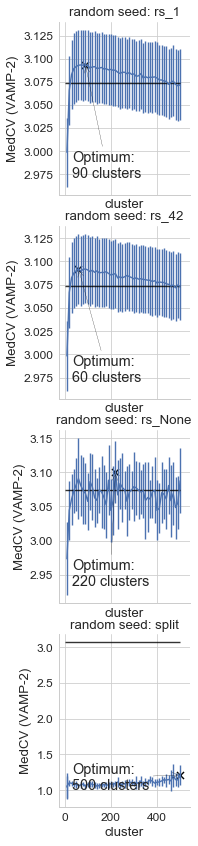

In [12]:

with sns.plotting_context('paper', font_scale=1.5):
    sns.set_style('whitegrid')
    g = sns.FacetGrid(data=df, row='project_name', row_order=project_names, sharey='row')
    g.map(plt.errorbar, 'cluster__n_bins_per_feature', 'test_scores_median','test_scores_std')
    g.set(ylabel='MedCV (VAMP-2)', xlabel='cluster')
    g.set_titles("random seed: {row_name}")
    for i, ax in enumerate(g.axes.flatten()):
        ax.hlines(vamp2_k4, 0, 500, color='k', alpha=0.8)
        idx = (best_df['project_name']==project_names[i]) 

        x = best_df.loc[idx, 'cluster__n_bins_per_feature']
        y = best_df.loc[idx, 'test_scores_median']
        ax.scatter(x, y, marker='x', s=50, c='k')

        label = 'Optimum:\n{} clusters'.format(x.values[0])
        ax.annotate(label,
                xy=(x, y), xycoords='data',
                xytext=(.1, .1),  textcoords='axes fraction', 
                arrowprops=dict(arrowstyle="->",
                                connectionstyle="arc3"),
                )
    plt.savefig('../figures/shuffle_vs_no_shuffle.png', transparent=True)